In [3]:
import pandas as pd
import numpy as np 
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from scipy.stats import chi2_contingency
from sklearn.manifold import TSNE
from prince import FAMD
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Import data

In [4]:
mytrain= pd.read_csv( 'C:\\Users\Alice\Downloads\German_Credit_TRAIN.csv')
mytest =  pd.read_csv( 'C:\\Users\Alice\Downloads\German_Credit_TEST.csv')


### Create groups for continuous data 
#### Age, Credit Amount and Duration of credit

In [5]:
#making age group 19-25, 26-36, 37 up
bins= [19,25,36,75]
labels = ['Youth','Adult','Old.Adult']
mytrain['AgeGroup'] = pd.cut(mytrain['Age (years)'], bins=bins, labels=labels, right=False)
mytest['AgeGroup'] = pd.cut(mytest['Age (years)'], bins=bins, labels=labels, right=False)

# duration of credit group in train data
# less than 1 yr, 1-2 yr, more than 2 yr 
bins= [4,12,24,72]
labels = ['within 1 year','within 2 year','more than 2 year']
mytrain['Duration of credit'] = pd.cut(mytrain['Duration of Credit (month)'], bins=bins, labels=labels, right=False)
mytest['Duration of credit'] = pd.cut(mytest['Duration of Credit (month)'], bins=bins, labels=labels, right=False)

# credit amount group 
bins= [276,1995,9960,18424]
labels = ['less than 2k','middle','more than 10k']
mytrain['Credit Amount Group'] = pd.cut(mytrain['Credit Amount'], bins=bins, labels=labels, right=False)
mytest['Credit Amount Group'] = pd.cut(mytest['Credit Amount'], bins=bins, labels=labels, right=False)



## Data explortary with Creditability

<AxesSubplot:xlabel='Account Balance', ylabel='count'>

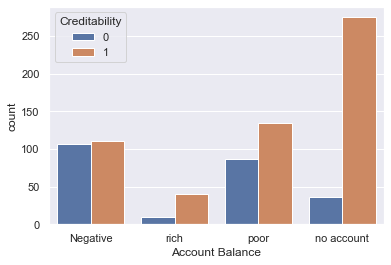

In [6]:
sns.countplot(x='Account Balance',hue ='Creditability',data=mytrain)
# no account people got creditability the most

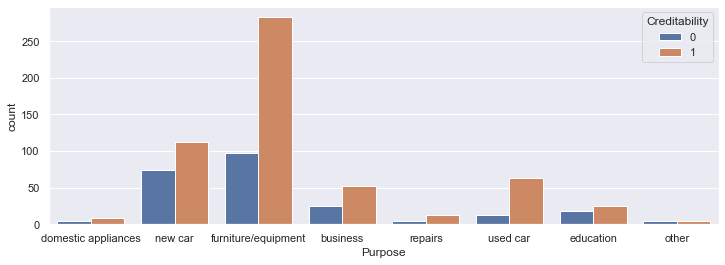

In [7]:
plt.figure(figsize=(12,4)) 
sns.countplot(x="Purpose",hue='Creditability', data=mytrain)
plt.show()
# used car could have higher chance to get money.
# furniture/ equipment is a popular reason to apply credit 

<AxesSubplot:xlabel='Type of apartment', ylabel='count'>

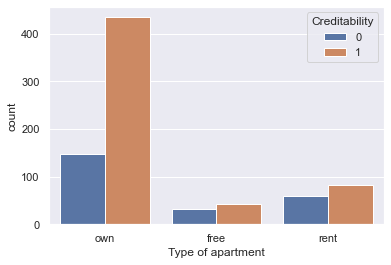

In [5]:
sns.countplot(x="Type of apartment",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

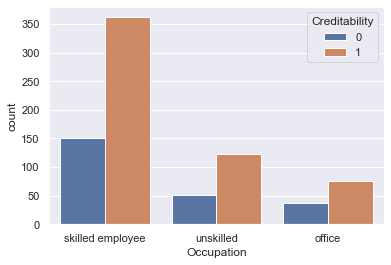

In [8]:
sns.countplot(x="Occupation",hue='Creditability', data=mytrain)
# skilled could get approval more

<AxesSubplot:xlabel='Value Savings/Stocks', ylabel='count'>

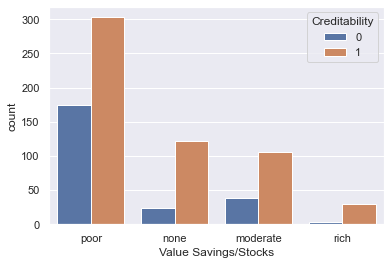

In [9]:
sns.countplot(x="Value Savings/Stocks",hue='Creditability', data=mytrain)
# seems like it does not matter how many saving 

<AxesSubplot:xlabel='Payment Status of Previous Credit', ylabel='count'>

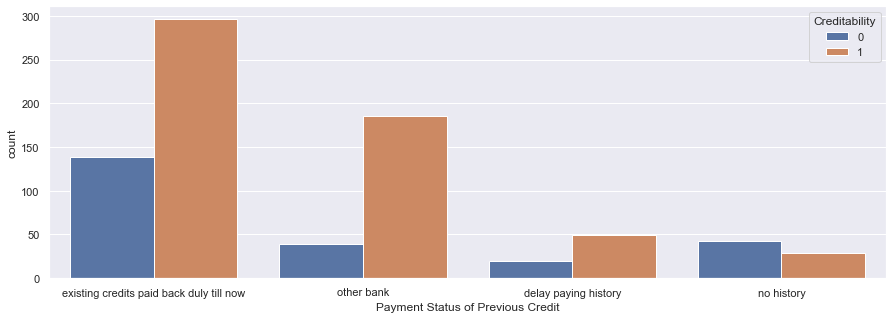

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x="Payment Status of Previous Credit",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Length of current employment', ylabel='count'>

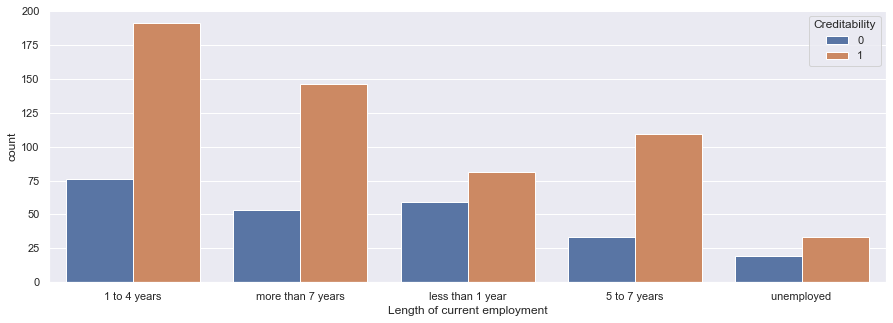

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x="Length of current employment",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Duration of Credit (month)', ylabel='count'>

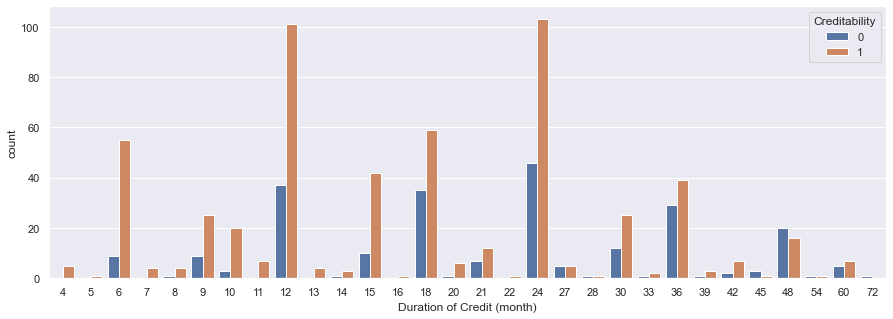

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x="Duration of Credit (month)",hue='Creditability', data=mytrain)
# lower duration could probably approve creditability 

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

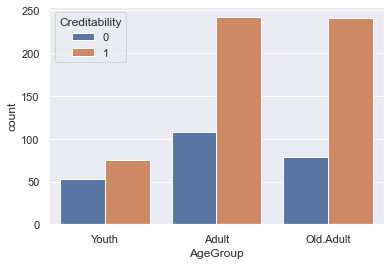

In [15]:
sns.countplot(x="AgeGroup",hue='Creditability', data=mytrain) 

<AxesSubplot:xlabel='Credit Amount Group', ylabel='count'>

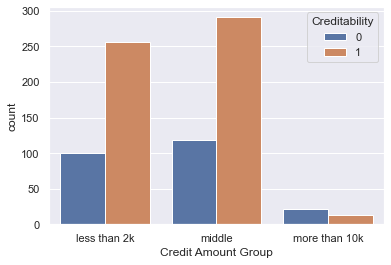

In [16]:
sns.countplot(x="Credit Amount Group",hue='Creditability', data=mytrain) 

<AxesSubplot:xlabel='Duration of credit', ylabel='count'>

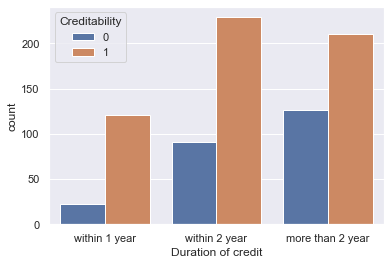

In [17]:
sns.countplot(x="Duration of credit",hue='Creditability', data=mytrain) 

<AxesSubplot:xlabel='Instalment per cent', ylabel='count'>

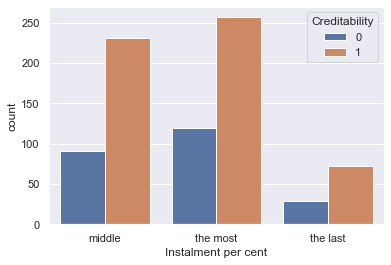

In [19]:

sns.countplot(x="Instalment per cent",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Value Savings/Stocks', ylabel='count'>

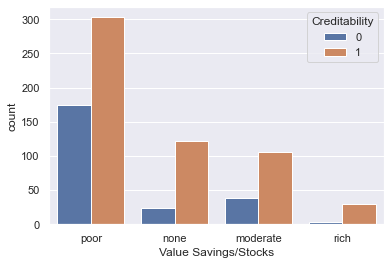

In [20]:
sns.countplot(x="Value Savings/Stocks",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Concurrent Credits', ylabel='count'>

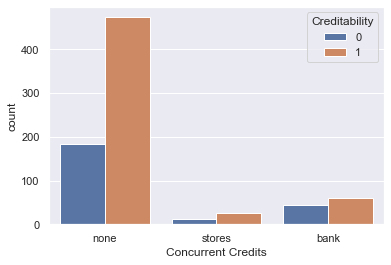

In [21]:

sns.countplot(x="Concurrent Credits",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Most valuable available asset', ylabel='count'>

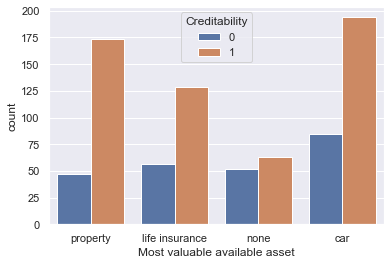

In [22]:
sns.countplot(x="Most valuable available asset",hue='Creditability', data=mytrain)

## Convert categorical data to dummy variables 

In [134]:
mytraindum=pd.get_dummies(mytrain, columns=['Account Balance','Purpose','Value Savings/Stocks','Payment Status of Previous Credit','Length of current employment','Instalment per cent','Sex','Marital Status','Duration in Current address','Most valuable available asset','Concurrent Credits','Type of apartment','Occupation','AgeGroup','Duration of credit','Credit Amount Group'])

mytestdum=pd.get_dummies(mytest, columns=['Account Balance','Purpose','Value Savings/Stocks','Payment Status of Previous Credit','Length of current employment','Instalment per cent','Sex','Marital Status','Duration in Current address','Most valuable available asset','Concurrent Credits','Type of apartment','Occupation','AgeGroup','Duration of credit','Credit Amount Group'])

## Heatmap of variable correlation 

In [28]:
map1= mytraindum.drop(['ID','Sex_Female','Sex_female','Payment Status of Previous Credit_delay paying history','Payment Status of Previous Credit_no history','Payment Status of Previous Credit_no history','Payment Status of Previous Credit_other bank','Purpose_business','Purpose_domestic appliances','Purpose_education','Purpose_other','Purpose_repairs','Payment Status of Previous Credit_existing credits paid back duly till now','Payment Status of Previous Credit_other bank','Account Balance_poor','Value Savings/Stocks_moderate','Length of current employment_more than 7 years','Instalment per cent_the most','Marital Status_married','Duration in Current address_5 to 7 years','Duration in Current address_more than 7 years','Most valuable available asset_life insurance','Occupation_unskilled','Concurrent Credits_stores','Type of apartment_rent','Type of apartment_free'],axis=1)

Text(0.5, 1.0, 'Correlation Heatmap')

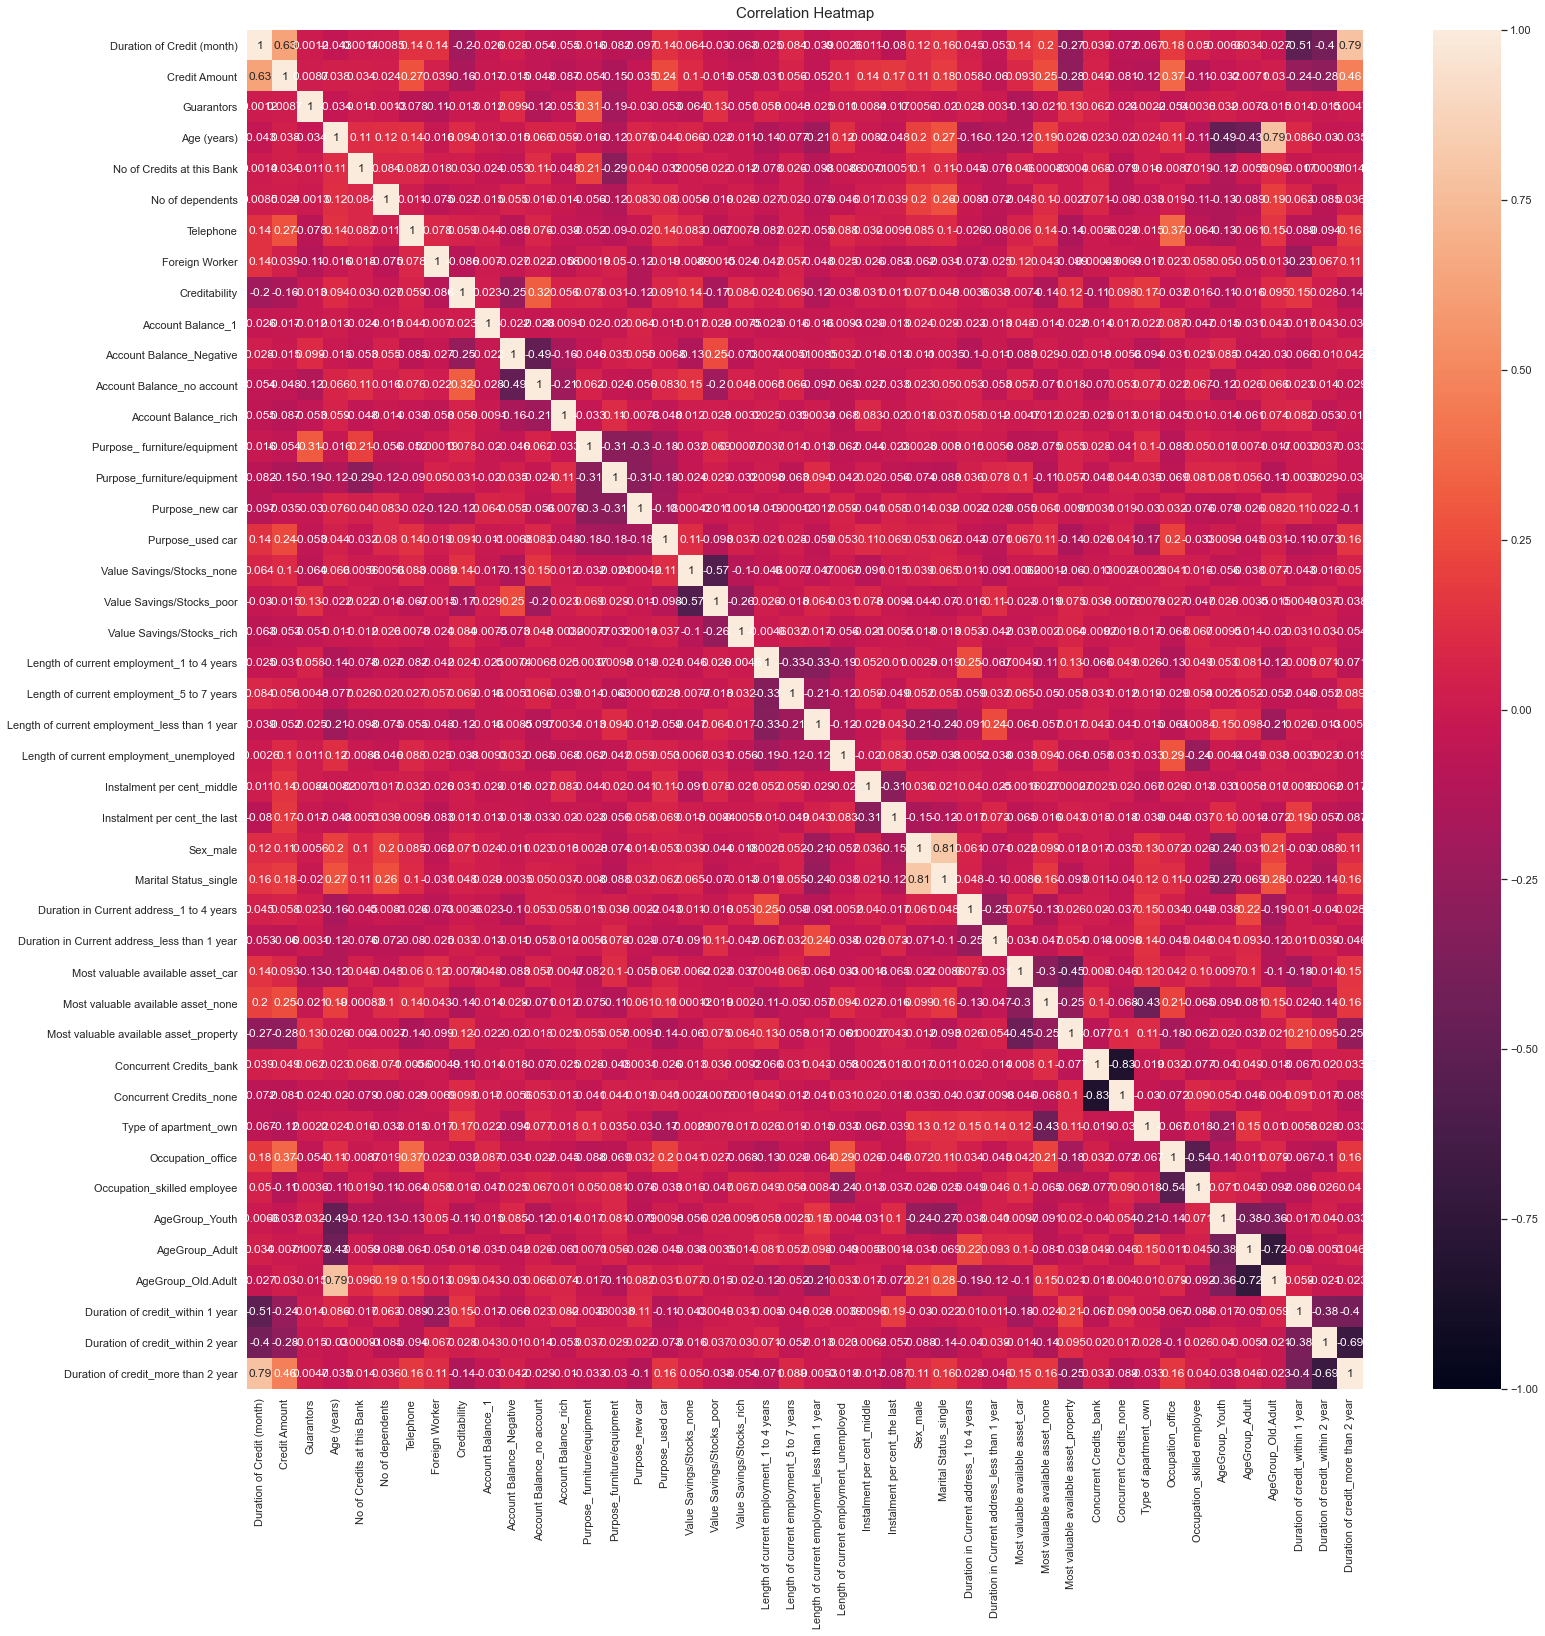

In [29]:
plt.figure(figsize=(25, 25))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(map1.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)

### Drop string data for predictive models 

In [138]:
# split train and test data

k = mytraindum.drop(['ID','Age (years)','Duration of Credit (month)','Credit Amount'],axis=1)
j= mytraindum['Creditability']
X_train, X_test, y_train, y_test = train_test_split(k, j, test_size=0.33, random_state=0)

## Recursive Feature Elimination

In [140]:
#using RFE to select important feature for logistic regression
#select 25 variables for the model

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=25)
model = LogisticRegression(solver='liblinear')
rfe.fit(k, j)


RFE(estimator=LogisticRegression(), n_features_to_select=25)

In [141]:
print(rfe.support_)

# Foreign Worker,creditability, Account Balance_Negative , Account Balance_no account,Account Balance_poor, Purpose_education,Purpose_new car,Purpose_used car,Value Savings/Stocks_none,Value Savings/Stocks_poor,Value Savings/Stocks_rich,Payment Status of Previous Credit_no history,Length of current employment_1 to 4 years,Length of current employment_less than 1 year,Duration in Current address_less than 1 year, Most valuable available asset_none,Most valuable available asset_property,Concurrent Credits_bank,Type of apartment_own,Type of apartment_rent

# those variables above are selected based on RFE

[False False False  True  True  True False  True False  True  True  True
 False False False  True False  True False False  True False  True  True
 False False False  True  True False  True  True False False False False
 False False False False False False False False False False False False
  True  True False False False False  True  True False False False False
 False  True  True False  True False  True  True]


In [142]:
print(rfe.ranking_)
#recursive feature elimination important variables' ranking 

[22 13  6  1  1  1 12  1 29  1  1  1 18 33 30  1 10  1 43 40  1 14  1  1
  4 39 23  1  1 24  1  1 27 36 20 19  5 26  7 16 17 25  9 32  2 35 31 44
  1  1  3 11 28 37  1  1 38 42 41  8 21  1  1 15  1 34  1  1]


In [247]:
# put those selected variables together 
cols= ['Foreign Worker','Account Balance_Negative','Account Balance_no account','Purpose_new car','Purpose_used car','Purpose_education','Value Savings/Stocks_none','Value Savings/Stocks_rich','Value Savings/Stocks_poor','Payment Status of Previous Credit_no history','Most valuable available asset_none','Most valuable available asset_property','Length of current employment_1 to 4 years','Length of current employment_less than 1 year','Type of apartment_own','Type of apartment_rent','Duration of credit_within 1 year','Duration of credit_more than 2 year','Concurrent Credits_bank','Duration in Current address_less than 1 year','AgeGroup_Old.Adult','Credit Amount Group_middle']

X= mytraindum[cols]
y=mytraindum['Creditability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [211]:
print(k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 68 columns):
 #   Column                                                                      Non-Null Count  Dtype
---  ------                                                                      --------------  -----
 0   Guarantors                                                                  800 non-null    int64
 1   No of Credits at this Bank                                                  800 non-null    int64
 2   No of dependents                                                            800 non-null    int64
 3   Telephone                                                                   800 non-null    int64
 4   Foreign Worker                                                              800 non-null    int64
 5   Creditability                                                               800 non-null    int64
 6   kmeans2                                                           

## Logistic regression

In [250]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.469254
         Iterations 7
                                       Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.230     
Dependent Variable:           Creditability             AIC:                       547.0405  
Date:                         2021-05-28 19:29          BIC:                       641.2914  
No. Observations:             536                       Log-Likelihood:            -251.52   
Df Model:                     21                        LL-Null:                   -326.74   
Df Residuals:                 514                       LLR p-value:               1.4455e-21
Converged:                    1.0000                    Scale:                     1.0000    
No. Iterations:               7.0000                                                         
--------------------------------------------------------------------------------------------

In [260]:

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [240]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 46  34]
 [ 20 164]]


In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.57      0.63        80
           1       0.83      0.89      0.86       184

    accuracy                           0.80       264
   macro avg       0.76      0.73      0.74       264
weighted avg       0.79      0.80      0.79       264



In [45]:
h= mytestdum[cols]
test= logreg.predict(h)


## Random forest

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [252]:
#random forest 
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [253]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7272727272727273


## Nerual network

In [255]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train2 = scaler.transform(X_train)

X_test2 = scaler.transform(X_test)


In [257]:
#create layers 
model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(22,)))

model.add(Dense(11, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(X_train2, y_train,epochs=8, batch_size=1, verbose=1)

Epoch 1/8
536/536 [==============================] - 1s 1ms/step - loss: 0.6354 - accuracy: 0.6586
Epoch 2/8
536/536 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.7183
Epoch 3/8
536/536 [==============================] - 1s 1ms/step - loss: 0.5232 - accuracy: 0.7425
Epoch 4/8
536/536 [==============================] - 1s 1ms/step - loss: 0.4979 - accuracy: 0.7463
Epoch 5/8
536/536 [==============================] - 1s 1ms/step - loss: 0.4791 - accuracy: 0.7631
Epoch 6/8
536/536 [==============================] - 1s 1ms/step - loss: 0.4680 - accuracy: 0.7631
Epoch 7/8
536/536 [==============================] - 1s 1ms/step - loss: 0.4556 - accuracy: 0.7668
Epoch 8/8
536/536 [==============================] - 1s 1ms/step - loss: 0.4502 - accuracy: 0.7687


In [258]:
#neural network predition 
y_pred2 = model.predict(X_test2)

score = model.evaluate(X_test2, y_test,verbose=1)

print(score)

9/9 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7803
[0.48538872599601746, 0.7803030014038086]


In [59]:
mytepstdumdro = mytestdum[cols]

In [60]:
test_pred = logreg.predict(mytepstdumdro)
df = pd.DataFrame(data=test_pred)

## Correlation of variables in predictive model

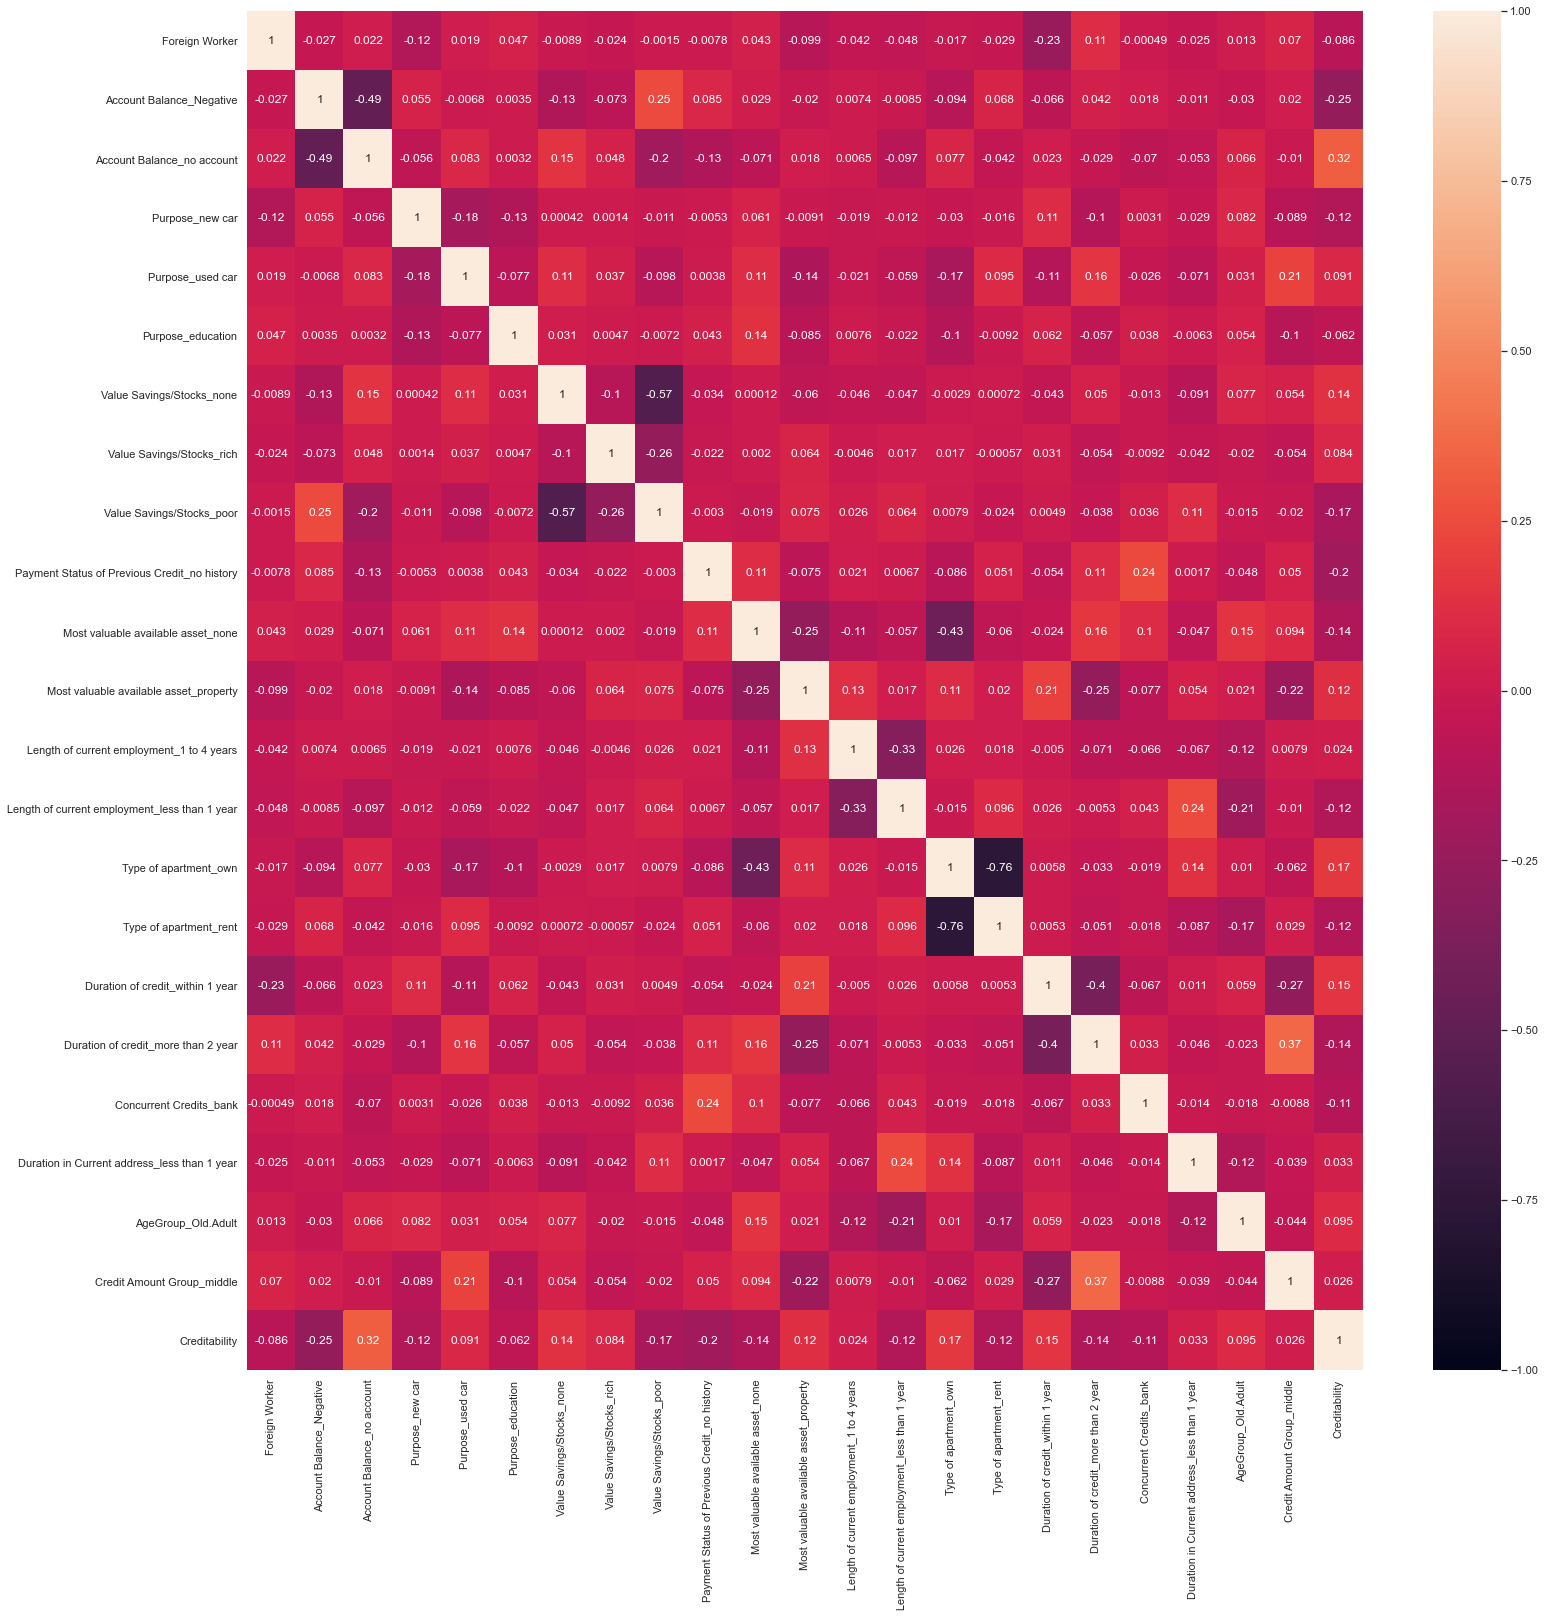

In [244]:
r= ['Foreign Worker','Account Balance_Negative','Account Balance_no account','Purpose_new car','Purpose_used car','Purpose_education','Value Savings/Stocks_none','Value Savings/Stocks_rich','Value Savings/Stocks_poor','Payment Status of Previous Credit_no history','Most valuable available asset_none','Most valuable available asset_property','Length of current employment_1 to 4 years','Length of current employment_less than 1 year','Type of apartment_own','Type of apartment_rent','Duration of credit_within 1 year','Duration of credit_more than 2 year','Concurrent Credits_bank','Duration in Current address_less than 1 year','AgeGroup_Old.Adult','Credit Amount Group_middle','Creditability']
X1= mytraindum[r]
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(X1.corr(), vmin=-1, vmax=1, annot=True)

## Clustering analysis

In [63]:
import sys
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA


In [ ]:
results.head()

In [106]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2)
mytraindum['kmeans2'] = kmeans2.fit_predict(mytraindum)

In [107]:
kmeans3 = KMeans(n_clusters=3)
mytraindum['kmeans3'] = kmeans3.fit_predict(mytraindum)

In [108]:
mytrain['kmeans2']=mytraindum['kmeans2']
mytrain['kmeans3']=mytraindum['kmeans3']

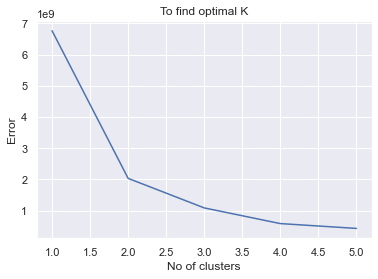

In [109]:
Error =[]
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i).fit(mytraindum)
    kmeans.fit(mytraindum)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 6), Error)
plt.title('To find optimal K')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

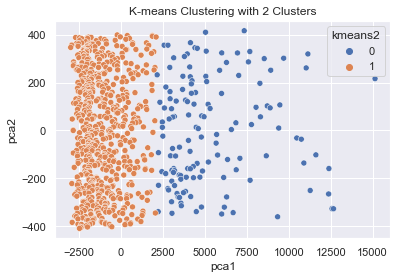

In [110]:
reduced_data = PCA(n_components=2).fit_transform(mytraindum)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results
sns.scatterplot(x="pca1", y="pca2", hue=mytraindum['kmeans2'], data=results)
plt.title('K-means Clustering with 2 Clusters')
plt.show()

<AxesSubplot:title={'center':'Credit Amount'}, xlabel='kmeans2'>

<Figure size 864x864 with 0 Axes>

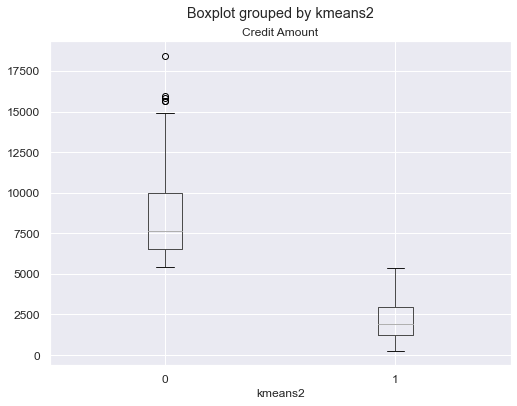

In [111]:
plt.figure(figsize=(12,12))
mytraindum.boxplot('Credit Amount','kmeans2',fontsize=12,figsize=(8,6))
# credit amount vs clusters 
#cluster 0 has average $2500 credit amount while cluster 1 has average $7500

<AxesSubplot:title={'center':'Credit Amount'}, xlabel='kmeans3'>

<Figure size 864x864 with 0 Axes>

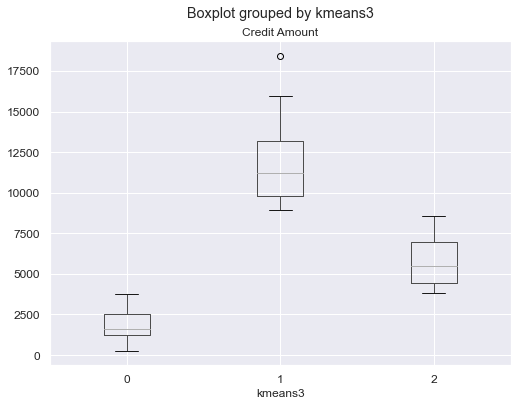

In [112]:
plt.figure(figsize=(12,12))
mytraindum.boxplot('Credit Amount','kmeans3',fontsize=12,figsize=(8,6))

<AxesSubplot:title={'center':'Duration of Credit (month)'}, xlabel='kmeans2'>

<Figure size 864x864 with 0 Axes>

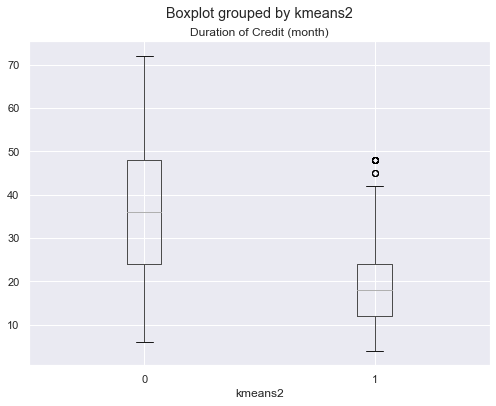

In [113]:
plt.figure(figsize=(12,12))
mytraindum.boxplot('Duration of Credit (month)','kmeans2',figsize=(8,6))
#cluster0 is duration within 2 years while cluster 1 is duration more than 2 years 

<AxesSubplot:title={'center':'Duration of Credit (month)'}, xlabel='kmeans3'>

<Figure size 864x864 with 0 Axes>

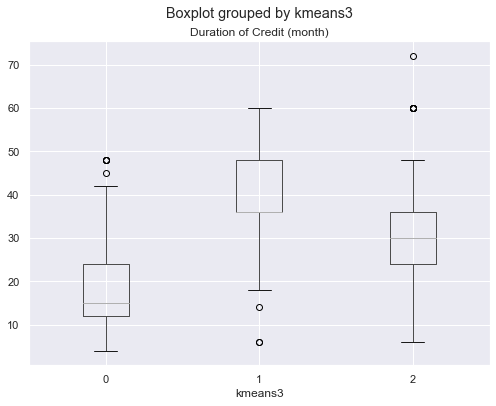

In [114]:
plt.figure(figsize=(12,12))
mytraindum.boxplot('Duration of Credit (month)','kmeans3',figsize=(8,6))

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

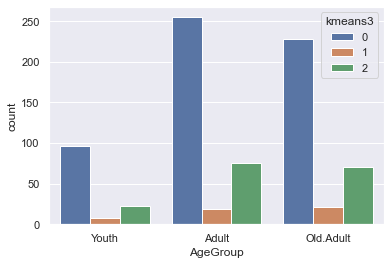

In [118]:
sns.countplot(x='AgeGroup',hue='kmeans3',data=mytrain)

<AxesSubplot:xlabel='kmeans3', ylabel='count'>

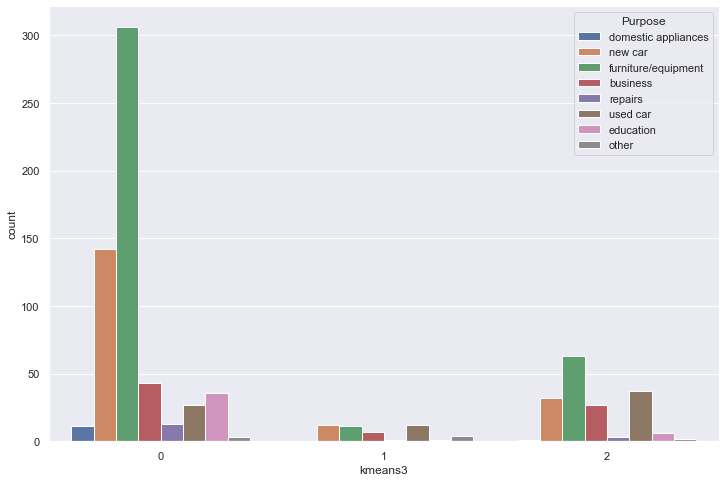

In [119]:
plt.figure(figsize=(12,8))
sns.countplot(x= 'kmeans3',hue='Purpose',data=mytrain)

<AxesSubplot:xlabel='kmeans2', ylabel='count'>

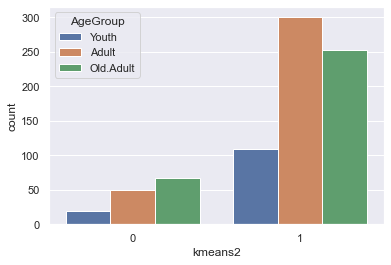

In [76]:
sns.countplot(x='kmeans2',hue='AgeGroup',data=mytrain)

<AxesSubplot:xlabel='kmeans3', ylabel='count'>

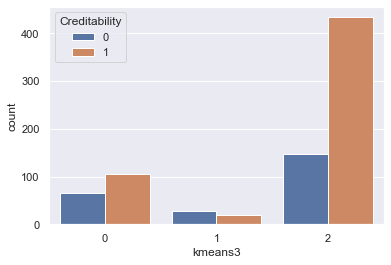

In [77]:
sns.countplot(x='kmeans3',hue='Creditability',data=mytrain)

C:\Users\Alice\anaconda3\envs\Data\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kmeans2', ylabel='count'>

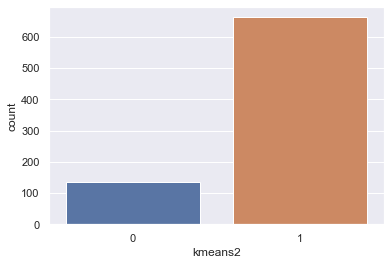

In [78]:
sns.countplot('kmeans2',data=mytrain)

C:\Users\Alice\anaconda3\envs\Data\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kmeans3', ylabel='count'>

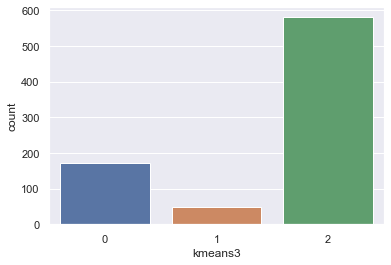

In [224]:
sns.countplot('kmeans3',data=mytrain)

<AxesSubplot:xlabel='kmeans2', ylabel='count'>

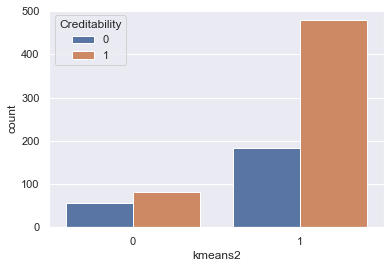

In [79]:
sns.countplot(x='kmeans2',hue='Creditability',data=mytraindum)

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

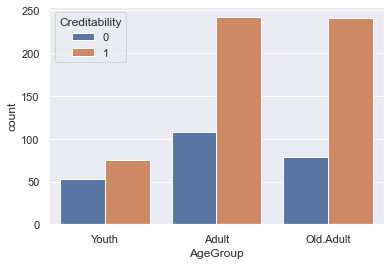

In [81]:
sns.countplot(x='AgeGroup',hue='Creditability',data=mytraindum)

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

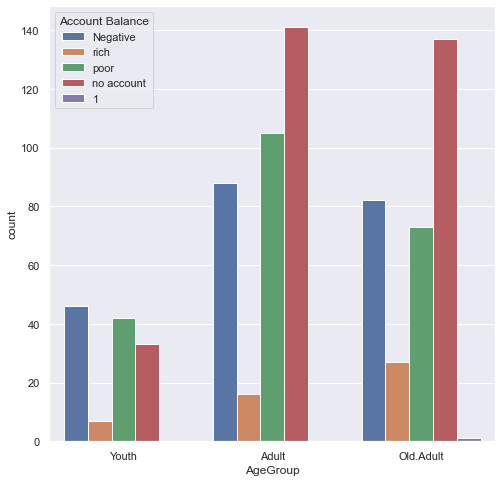

In [82]:
plt.figure(figsize=(8,8))
sns.countplot(x='AgeGroup',hue='Account Balance',data=mytrain)

<AxesSubplot:xlabel='AgeGroup', ylabel='Duration of Credit (month)'>

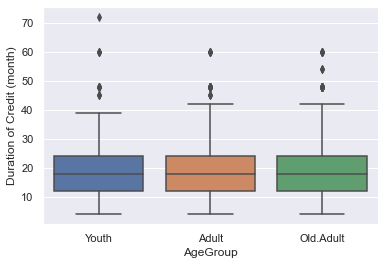

In [83]:
sns.boxplot(x='AgeGroup',y='Duration of Credit (month)',data=mytraindum)

In [262]:
mytraindum.to_csv('german train.csv')
mytestdum.to_csv('german test.csv')